In [56]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

In [57]:
#Reading the dataset
df = pd.read_csv('bankData.csv')
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#### Performing basic EDA on the data

In [58]:
# Shape
df.shape

(45211, 17)

In [59]:
# Types
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [61]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


We see there are negative values in "balance". 

It could be that the account allows negative balance or it could be an error. 

#### Checking the presence of missing values 

In [62]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

There are no missing values in the dataset

#### Checking the presence of outliers 

In [63]:
#Checking skewness of various columns
df.skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

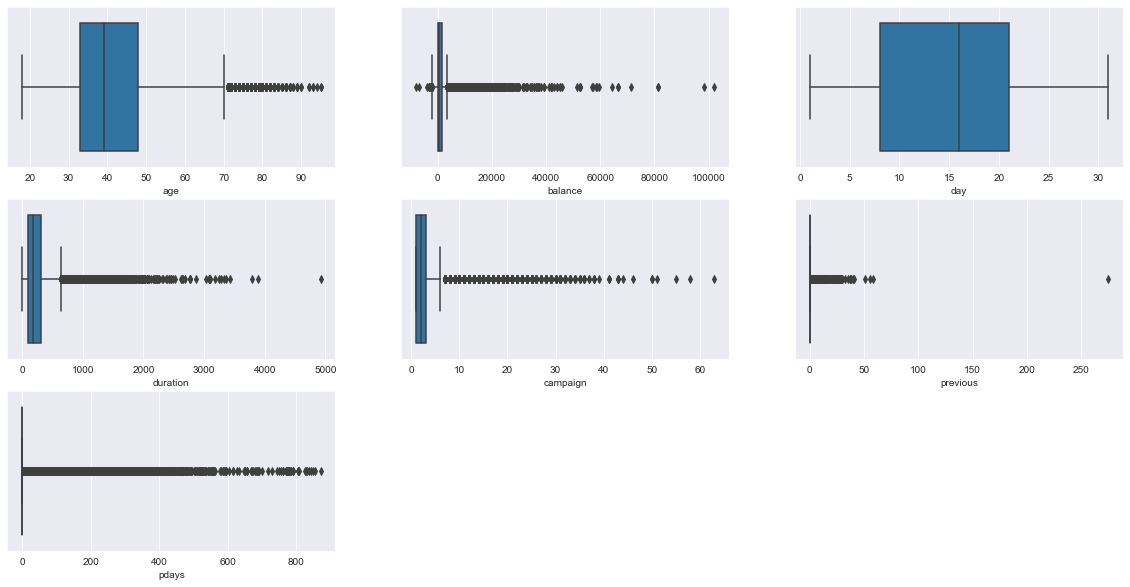

In [64]:
# creating a boxplot for all numeric features
plt.figure(figsize = (20,10))

plt.subplot(3,3,1)
sns.boxplot(x=df['age'])

plt.subplot(3,3,2)
sns.boxplot(x=df['balance'])

plt.subplot(3,3,3)
sns.boxplot(x=df['day'])

plt.subplot(3,3,4)
sns.boxplot(x=df['duration'])

plt.subplot(3,3,5)
sns.boxplot(x=df['campaign'])

plt.subplot(3,3,6)
sns.boxplot(x=df['previous'])

plt.subplot(3,3,7)
sns.boxplot(x=df['pdays'])
plt.show()

Outliers in case of age doesn't matter, as it is a personal trait

However many outliers are found in other numerical variables and we will work on it to impute them

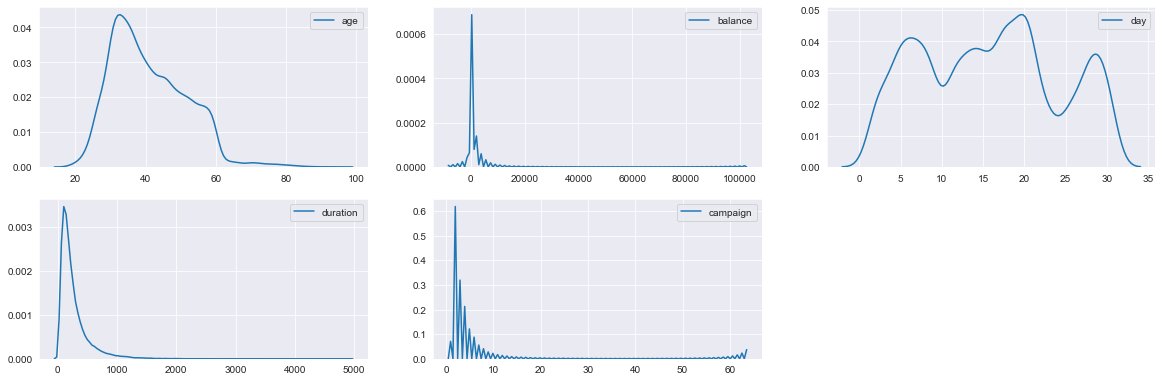

In [65]:
# creating a distribution for all numeric features
plt.figure(figsize = (20,10))

plt.subplot(3,3,1)
sns.kdeplot(df['age'])

plt.subplot(3,3,2)
sns.kdeplot(df['balance'])

plt.subplot(3,3,3)
sns.kdeplot(df['day'])

plt.subplot(3,3,4)
sns.kdeplot(df['duration'])

plt.subplot(3,3,5)
sns.kdeplot(df['campaign'])

#plt.subplot(3,3,6)
#sns.kdeplot(df['previous'])

#plt.subplot(3,3,7)
#sns.kdeplot(df['pdays'])
plt.show()

#### Removing OUTLIERS

In [66]:
def impute_outliers(df,col_name):
    x=df[col_name].quantile(0.10)
    y=df[col_name].quantile(0.90)
    df[col_name] = np.where(df[col_name] <x, x,df[col_name])
    df[col_name] = np.where(df[col_name] >y, y,df[col_name])
    return df

In [67]:
#Imputing outliers
df = impute_outliers(df,'balance')
df = impute_outliers(df,'duration')
df = impute_outliers(df,'campaign')

In [68]:
df.skew()

age          0.684818
balance      1.232895
day          0.093079
duration     0.860824
campaign     0.825797
pdays        2.615715
previous    41.846454
dtype: float64

Most of the outliers have been removed

#### The distribution of independent variables

In [69]:
table_categorical_features = df.select_dtypes(include=[np.object])
# display categorical features
table_categorical_features.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'Target'],
      dtype='object')

<AxesSubplot:>

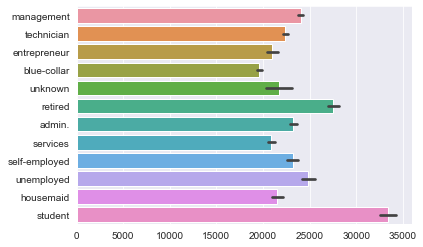

In [70]:
sns.barplot(df['job'].index, df.job.values)

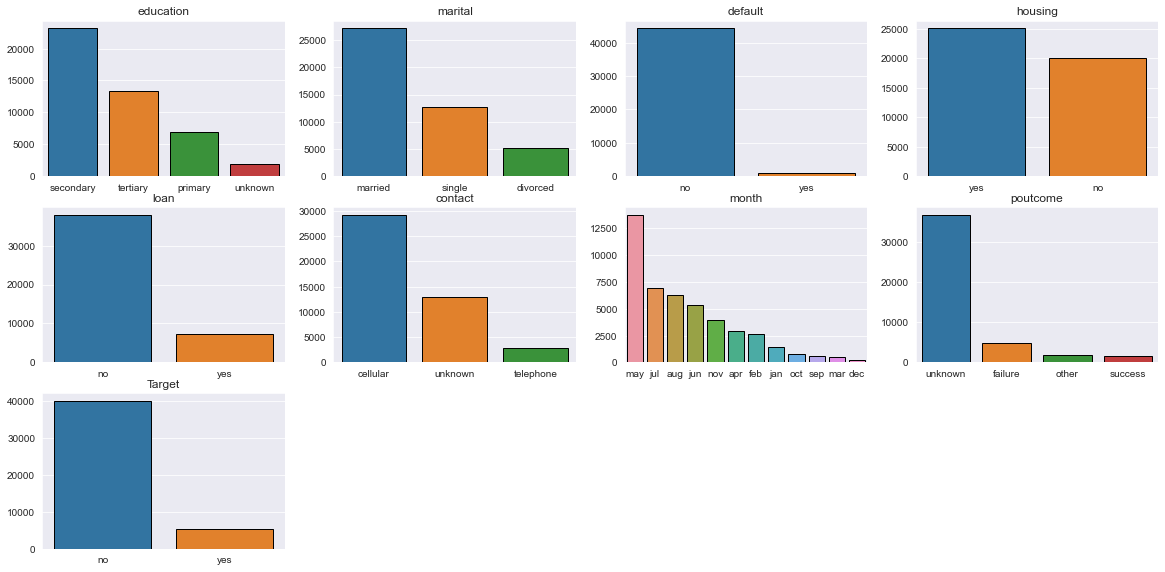

In [71]:
pos=1
plt.figure(figsize=(20,20))
for column in ['education', 'marital',  'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'Target']:
    plt.subplot(6,4,pos)
    series=df[column].value_counts()
    sns.barplot(series.index, series.values, edgecolor="black")
    plt.title(column)
    pos+=1
plt.show()

#### Checking the frequency distribution of target feature

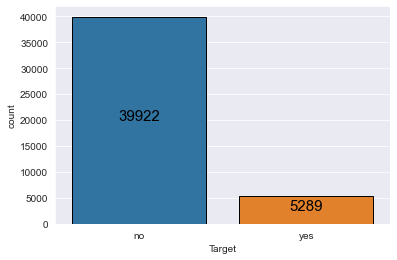

In [72]:
plot = sns.countplot(df.Target, edgecolor = 'black')
bars = plot.patches
plot.annotate(bars[0].get_height(), (0, bars[0].get_height()/2),
              ha = 'center', fontsize = 15, color = 'black')
plot.annotate(bars[1].get_height(), (1, bars[1].get_height()/2),
              ha = 'center', fontsize = 15, color = 'black')
plt.show()
percentage_diff = round(100*(bars[0].get_height() - bars[1].get_height())/((bars[0].get_height() + bars[1].get_height())/2),1)

That is a significant amount of imbalance in the target variable as clearly visible from the bar graph above 

#### Bivariate analysis using pairplot

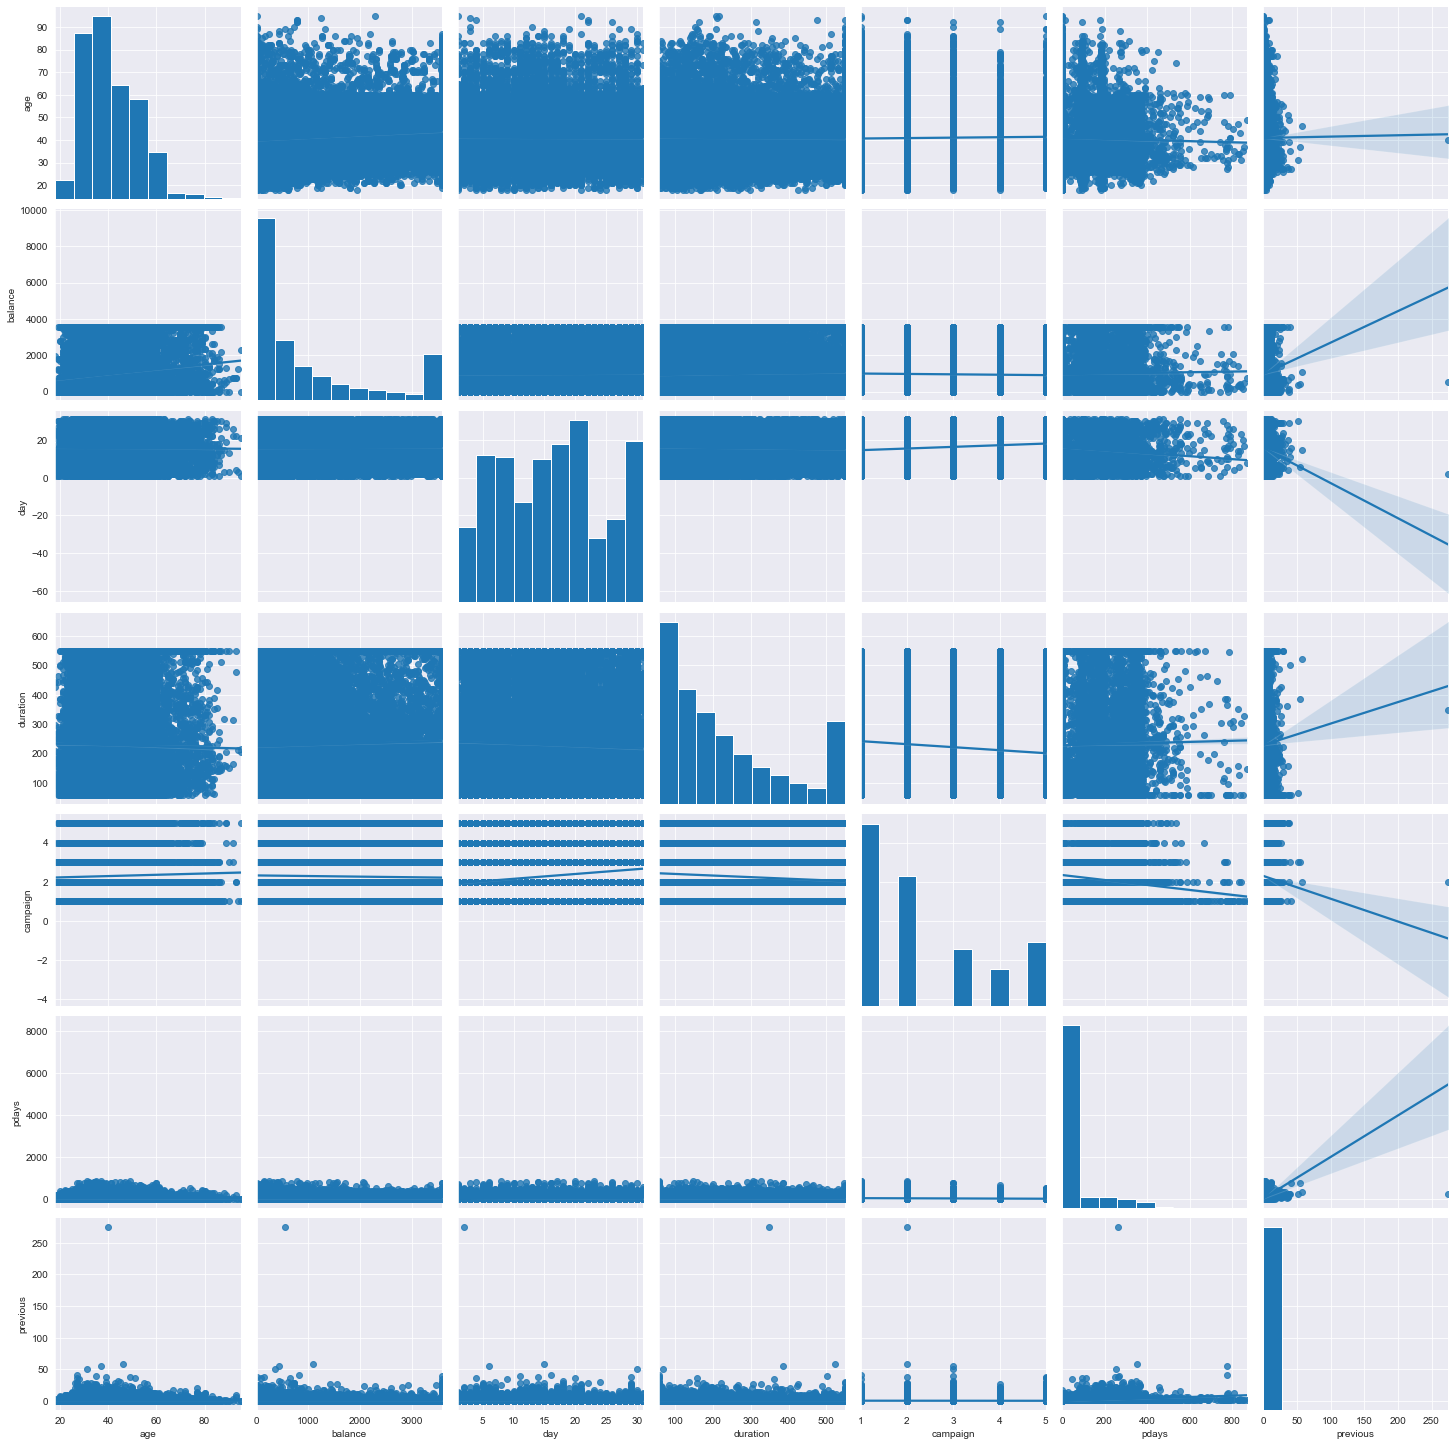

In [73]:
pp=sns.pairplot(df, kind='reg')
pp.fig.set_size_inches(20,20)

There seems to be no strong correlation between any columns so we have to include all the columns for our model

#### Checking correlation among independent features

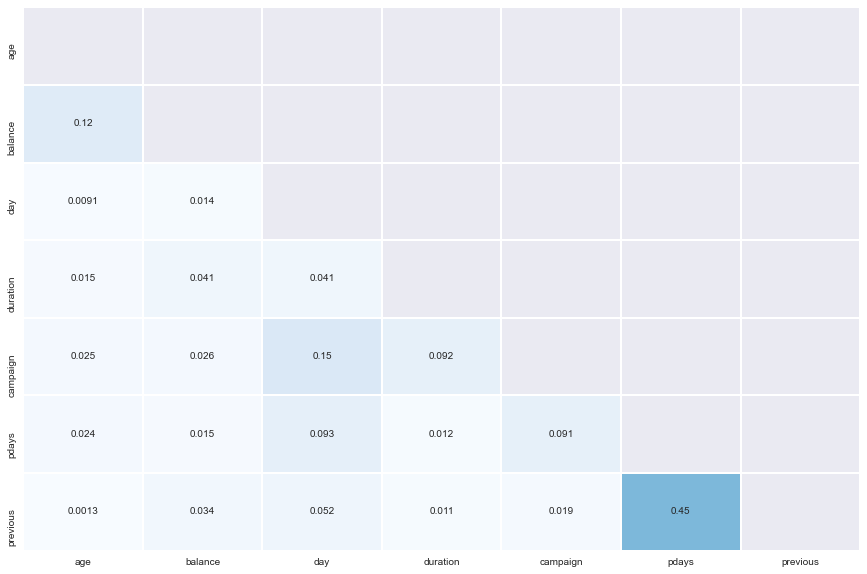

In [74]:
def correlation_plot(df):
    corr = abs(df.corr()) # correlation matrix
    lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
    mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

    plt.figure(figsize = (15,10))  # setting the figure size
    sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', xticklabels = corr.index,
                yticklabels = corr.columns,cbar = False, annot= True, linewidths= 1, mask = mask)   #Heatmap
    plt.show()
correlation_plot(df)

There is no significant correlation between the columns

### Preparing the data to train a model 

In [75]:
cat = df.columns[df.dtypes == 'object']

In [76]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in cat:
    df[i] = le.fit_transform(df[i])

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143.0,1,0,2,5,8,261.0,1.0,-1,0,3,0
1,44,9,2,1,0,29.0,1,0,2,5,8,151.0,1.0,-1,0,3,0
2,33,2,1,1,0,2.0,1,1,2,5,8,76.0,1.0,-1,0,3,0
3,47,1,1,3,0,1506.0,1,0,2,5,8,92.0,1.0,-1,0,3,0
4,33,11,2,3,0,1.0,0,0,2,5,8,198.0,1.0,-1,0,3,0


In [77]:
#Segregating independent and dependent variables
X = df.drop(columns= 'Target')
y = df.Target

#Splitting data to training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 1)

### Training a decision tree model and examining their performances across different classificationmetrics

In [78]:
from sklearn import metrics
def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, train data and test data as input
       
    model.fit(X_train, y_train)   # fit the model using the train data
    pred = model.predict(X_test)     # model predictions on the test data
    score = round(model.score(X_test, y_test), 3)   # accuracy on the test data

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, pred).ravel()  # confusion matrix for y_test and pred_test

    recall = round(tp/(tp+fn), 3)     # calculate recall
    precision = round(tp/(tp+fp), 3)  # calculate precision
    specificity =round(tn/(tn+fp),3)  # calculate specificity
    f1_score =  round(2*precision*recall/(precision + recall), 3)   # calculate f1 score
    
    return score, recall, precision, specificity, f1_score  # return all the metrics

In [79]:
#Creating model objects
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver= 'liblinear')

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

result = pd.DataFrame(columns = ['score,', 'recall,', 'precision,', 'specificity,', 'f1_score'])

for model, model_name  in list(zip([log, dt, nb], ['Logistic_Regression', 'Decision tree', 'Naive_Bayes'])):
    result.loc[model_name] = fit_n_print(model, X_train, X_test, y_train, y_test)

In [80]:
#Displaying the result
result

,"score,","recall,","precision,","specificity,",f1_score
Logistic_Regression,0.885,0.218,0.517,0.973,0.307
Decision tree,0.871,0.468,0.450,0.924,0.459
Naive_Bayes,0.843,0.473,0.366,0.892,0.413


### Building the ensemble models (random forest, bagging classifier, Adaboosting, and gradient boosting, and stacking classifier) 

In [81]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,StackingClassifier

bg = BaggingClassifier(n_estimators=100)
rf = RandomForestClassifier(n_estimators=100)
ab = AdaBoostClassifier()
gb = GradientBoostingClassifier()
estimators = [('dt', dt), ('rf', rf), ('bg', bg), ('gb', gb), ('ab', ab)]
clf = StackingClassifier(estimators = estimators, final_estimator = rf)

for model, model_name  in list(zip([bg, rf, ab, gb,clf], ['Bagging', ' RandomForest', ' AdaBoost', ' GradientBoostingClassifier','StackingClassifier'])):
    result.loc[model_name] = fit_n_print(model, X_train, X_test, y_train, y_test) 

In [82]:
#Displaying the result
result

,"score,","recall,","precision,","specificity,",f1_score
Logistic_Regression,0.885,0.218,0.517,0.973,0.307
Decision tree,0.871,0.468,0.450,0.924,0.459
Naive_Bayes,0.843,0.473,0.366,0.892,0.413
Bagging,0.896,0.417,0.578,0.960,0.484
RandomForest,0.898,0.366,0.607,0.969,0.457
AdaBoost,0.892,0.340,0.564,0.965,0.424
GradientBoostingClassifier,0.898,0.330,0.622,0.973,0.431
StackingClassifier,0.894,0.419,0.560,0.956,0.479


____________
### Comparing performances of all the models:-

#### From the above comparison table, it is evident that for this case Random Forest classifier has the highest accuracy

#### All models have low recall, precision and f1 score

#### Highest specificty was found out to be of Logisitic Regression and Gradient Boosting Classifier model, although all models has almost same level of specificity

Note: For different purposes we require a good fit w.r.t other parameters, i.e. depending on the need as to how much accuarcy do we need (In some cases we prefer a model that is tightly fit and in some case we need a model that can compensate for variance)
